# Computer Vision Task


<p>You can download train and test dataset from <a href = "https://drive.google.com/drive/folders/1F2PjpJ_u_iaD-Fs0wwcymRiVVLK34-Fu">here</a>. This dataset has 4 classes. Labels for training data are provided, you have to submit labels of test data. Feel free to use any Machine learning or Deep learning technique.
</p>

# importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split 
from sklearn import preprocessing
import time

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Using Convulational Neural Net

<h2>Data Exploration</h2>

In [2]:
import pickle

with open('train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [3]:
len(train_data), len(train_labels)

(8000, 8000)

In [4]:
len(test_data)

2000

In [5]:
len(train_data[0])

784

In [6]:
train_data[0][0]

0

In [7]:
for i in range(10):
   print(len(train_data[i]),train_labels[i])


784 0
784 0
784 0
784 0
784 0
784 0
784 0
784 0
784 0
784 0


In [8]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)

In [9]:
unique(train_labels)

0
2
3
6


In [10]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
train_labels = np.array(train_labels)
train_labels

array([0, 0, 0, ..., 6, 6, 6])

<h2>Train Test splitting</h2>

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)

In [13]:
y_train.shape,y_test.shape

((6400,), (1600,))

<h2>Data Pre-processing</h2>

In [14]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
y_train.shape

(6400,)

In [16]:
oec = preprocessing.OneHotEncoder(sparse = False)
oec.fit(train_labels.reshape(-1,1))
y_train=oec.fit_transform(y_train.reshape((len(y_train),1)))
y_test=oec.transform(y_test.reshape((len(y_test),1)))


In [17]:
y_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [18]:
y_test.shape

(1600, 4)

In [19]:
x_train

array([[  0,   0,   2, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   2, ..., 170,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [20]:
y_test.shape

(1600, 4)

In [21]:
x_train.shape

(6400, 784)

In [22]:
x_train = x_train.reshape(6400,28,28)

In [23]:
x_test = x_test.reshape(1600,28,28)

In [24]:
x_train[0].shape

(28, 28)

<p> Visualising the first 16 items of the training dataset</p>

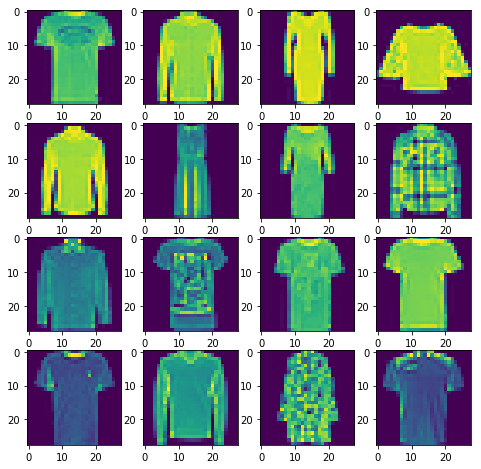

In [25]:
fig=plt.figure(figsize=(8,8))
for i in range(16):
    ax=fig.add_subplot(4,4,i+1)
    ax.imshow(x_train[i])
plt.show()

In [26]:
y_train[567]

array([0., 1., 0., 0.])

<h2>Visualising a shirt of Each Class</h2>

In [27]:
y_train[567]

array([0., 1., 0., 0.])

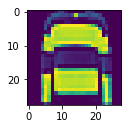

In [28]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(4,4,1)
ax.imshow(x_train[567])
plt.show()

In [29]:
y_train[587]

array([0., 0., 0., 1.])

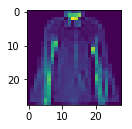

In [30]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(4,4,1)
ax.imshow(x_train[587])
plt.show()

In [31]:
y_train[456]

array([0., 0., 1., 0.])

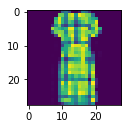

In [32]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(4,4,1)
ax.imshow(x_train[456])
plt.show()

In [33]:
y_train[0]

array([1., 0., 0., 0.])

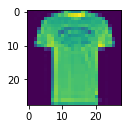

In [34]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(4,4,1)
ax.imshow(x_train[0])
plt.show()

<h2>Pre-processing the training and the testing data adn reshaping it.</h2>

In [35]:
x_train = x_train.reshape(6400,28,28,1)
x_train = x_train.astype('float32') / 255

In [36]:
x_test = x_test.reshape(1600,28,28,1)
x_test = x_test.astype('float32') / 255

In [37]:
x_test.shape

(1600, 28, 28, 1)

# Building The Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout,Flatten
from sklearn import datasets

In [39]:
def createModel(inshape,nClasses):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inshape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [40]:
model=createModel((28,28,1),4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

# Compilation,Fitting and Evaluation

In [42]:
batch_size = 200
epochs =15
start=time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_test,y_test))
 
model.evaluate(x_train, y_train)
end=time.time()-start
end

Instructions for updating:
Use tf.cast instead.
Train on 6400 samples, validate on 1600 samples
Epoch 1/15
6400/6400 [==============================] - 18s 3ms/step - loss: 0.8637 - acc: 0.6209 - val_loss: 0.6954 - val_acc: 0.7013
Epoch 2/15
6400/6400 [==============================] - 18s 3ms/step - loss: 0.6140 - acc: 0.7323 - val_loss: 0.6144 - val_acc: 0.7744
Epoch 3/15
6400/6400 [==============================] - 18s 3ms/step - loss: 0.5050 - acc: 0.8044 - val_loss: 0.4938 - val_acc: 0.8275
Epoch 4/15
6400/6400 [==============================] - 25s 4ms/step - loss: 0.4419 - acc: 0.8267 - val_loss: 0.4665 - val_acc: 0.8194
Epoch 5/15
6400/6400 [==============================] - 20s 3ms/step - loss: 0.3955 - acc: 0.8483 - val_loss: 0.4192 - val_acc: 0.8375
Epoch 6/15
6400/6400 [==============================] - 22s 3ms/step - loss: 0.3646 - acc: 0.8563 - val_loss: 0.4096 - val_acc: 0.8450
Epoch 7/15
6400/6400 [==============================] - 22s 3ms/step - loss: 0.3540 - acc: 0.8

310.0510370731354

<p>validation accuracy is 88 percent</p>

<h2>Visualisation of training accuracy,validation accuracy and training loss and validation loss.</h2>

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

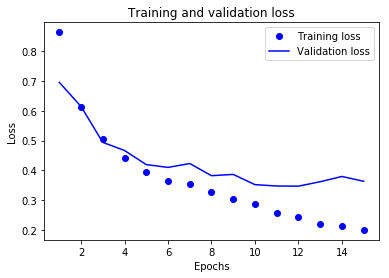

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


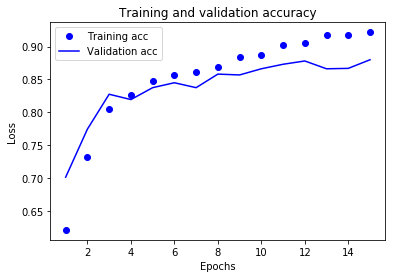

In [45]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predictions

In [46]:
ypred=model.predict(np.array(test_data).reshape(2000,28,28,1))

In [47]:
ypred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.8838231e-10],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [48]:
ypred=np.argmax(ypred,1)

In [49]:
ypred

array([0, 0, 0, ..., 3, 3, 3])

In [50]:
np.unique(ypred)

array([0, 1, 2, 3])

In [51]:
oec.active_features_

array([0, 2, 3, 6])

In [52]:
oec.feature_indices_

array([0, 7])

In [53]:
oec.n_values_

array([7])

<h2> Inverse Transforming The Predictions</h2>

In [54]:
y = []
for i in ypred:
    if i == 0:
        y.append(0)
    if i == 1:
        y.append(2)
    if i == 2:
        y.append(3)
    if i == 3:
        y.append(6)

In [55]:
import pandas as pd
image_id = [x for x in range(len(y))]
data = {"image_index":image_id, "class":y}
df = pd.DataFrame(data)

In [56]:
df

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [57]:
df.to_csv('prediction.csv',index=False)

# Using Simple Neural Net


In [58]:
import pickle

with open('train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)

<h2>Building The Model</h2>

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
model = Sequential()

In [61]:
layer1 = Dense(units=32, activation = 'relu', input_dim = 784)
model.add(layer1)
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=64, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu'))
model.add(Dense(units=4, activation = 'softmax'))

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<h2>Train Test Split</h2>

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)


In [64]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

<h2>Data Pre-processing</h2>

In [65]:
from sklearn import preprocessing

oec = preprocessing.OneHotEncoder(sparse = False)
oec.fit(np.array(train_labels).reshape(-1,1))
y_train=oec.fit_transform(y_train.reshape((len(y_train),1)))
y_test=oec.transform(y_test.reshape((len(y_test),1)))

In [66]:
x_test.shape,x_train.shape

((1600, 784), (6400, 784))

<h2>Model Fitting</h2>

In [67]:
model.fit(x_train, y_train, epochs=50, batch_size = 200, validation_data=(x_test, y_test))

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 1s 107us/step - loss: 0.4775 - acc: 0.7771 - val_loss: 0.3924 - val_acc: 0.8047
Epoch 2/50
6400/6400 [==============================] - 0s 14us/step - loss: 0.3253 - acc: 0.8498 - val_loss: 0.3099 - val_acc: 0.8586
Epoch 3/50
6400/6400 [==============================] - 0s 15us/step - loss: 0.2785 - acc: 0.8755 - val_loss: 0.3109 - val_acc: 0.8594
Epoch 4/50
6400/6400 [==============================] - 0s 16us/step - loss: 0.2690 - acc: 0.8817 - val_loss: 0.2891 - val_acc: 0.8761
Epoch 5/50
6400/6400 [==============================] - 0s 17us/step - loss: 0.2567 - acc: 0.8895 - val_loss: 0.2719 - val_acc: 0.8869
Epoch 6/50
6400/6400 [==============================] - 0s 16us/step - loss: 0.2400 - acc: 0.8978 - val_loss: 0.2561 - val_acc: 0.8931
Epoch 7/50
6400/6400 [==============================] - 0s 15us/step - loss: 0.2263 - acc: 0.9045 - val_loss: 0.2523 - val_acc: 0.8978
Epoch 

<p>Validation accuracy is 91.28 percent</p>

In [68]:
test_data = np.array(test_data)

In [69]:
test_data = test_data.astype('float32') / 255

In [70]:
test_data.shape

(2000, 784)

<h2>Visualisation of training accuracy,validation accuracy and training loss and validation loss.</h2>

In [71]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

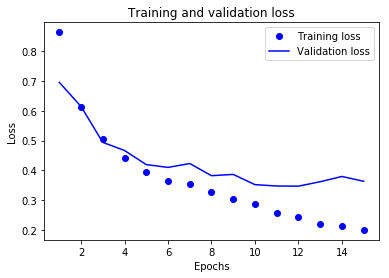

In [72]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

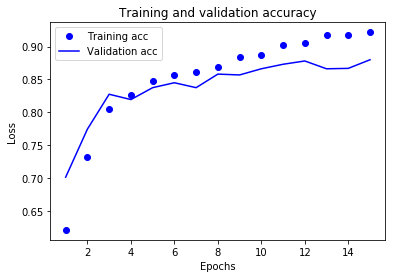

In [73]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [74]:
ypreds = model.predict(test_data)

In [75]:
ypreds.shape

(2000, 4)

In [76]:
ypreds=np.argmax(ypreds,1)

In [77]:
ypreds.shape

(2000,)

In [78]:
set(ypreds)

{0, 1, 2, 3}

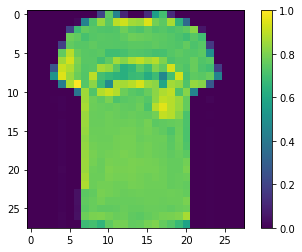

In [79]:

test_data = np.array(test_data).reshape(2000,28,28)
plt.figure()
plt.imshow(test_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [80]:
y[0]

0

<h2> Inverse Transforming The Predictions</h2>

In [81]:
y = []
for i in ypreds:
    if i == 0:
        y.append(0)
    if i == 1:
        y.append(2)
    if i == 2:
        y.append(3)
    if i == 3:
        y.append(6)

In [82]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 3,
 3,
 0,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 2,
 6,
 0,
 6,
 0,
 0,
 0,
 6,
 6,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 6,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 3,
 0,
 0,
 0,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 0,
 3,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 6,
 6,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,


In [83]:
import pandas as pd
image_id = [x for x in range(len(y))]
data = {"image_index":image_id, "class":y}
df = pd.DataFrame(data)

In [84]:
df

,image_index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [85]:
df.to_csv('Divyanshu_Aggarwal.csv',index=False)

<p>We got a better accuracy using simple deep neural net as compared to using CNN</p>

<p>Lets also apply SVM and see what can be the result</p>

# Using SVM and PCA

In [86]:
import pickle

with open('train_image.pkl', 'rb') as f:
    train_data = pickle.load(f)
    
with open('train_label.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('test_image.pkl', 'rb') as f:
    test_data = pickle.load(f)

<h2>Train Test Split</h2>

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)


In [88]:
import numpy as np
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [89]:
x_test.shape,x_train.shape

((1600, 784), (6400, 784))

<h2>Applying PCA</h2>

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA()

In [92]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [93]:
k=0
total=0
while total<0.95:
    total+=pca.explained_variance_ratio_[k]
    k+=1
print(k)

pca=PCA(n_components=k,whiten=True) #whiten works eqivalent to feature scaling in these k features


150


In [94]:
transformed_train = pca.fit_transform(x_train)
transformed_train.shape

(6400, 150)

In [95]:
transformed_test = pca.transform(x_test)
transformed_test.shape

(1600, 150)

<h2>Building the Model</h2>

In [96]:
from sklearn import svm

clf = svm.SVC(C= 100, gamma=0.005)
clf.fit(transformed_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Evaluations Score

In [97]:
clf.score(transformed_test,y_test)

0.825

<p>We get decent accuracy of 82.5 percent with SVM also. </p>